<a href="https://colab.research.google.com/github/raflinoob132/MachineLearning-1/blob/main/Week%203/Regression%20Income/Colab%20Notebook/Income_Classification_using_K_NN_and_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training model...

=== Evaluasi k-NN ===
Accuracy: 0.8385
Precision: 0.6848
Recall: 0.6097
F1-Score: 0.6451
ROC AUC: 0.8705


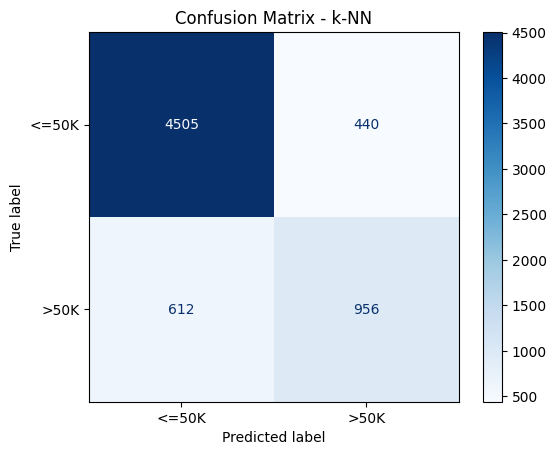


=== Evaluasi Decision Tree ===
Accuracy: 0.7815
Precision: 0.5279
Recall: 0.8756
F1-Score: 0.6587
ROC AUC: 0.8917


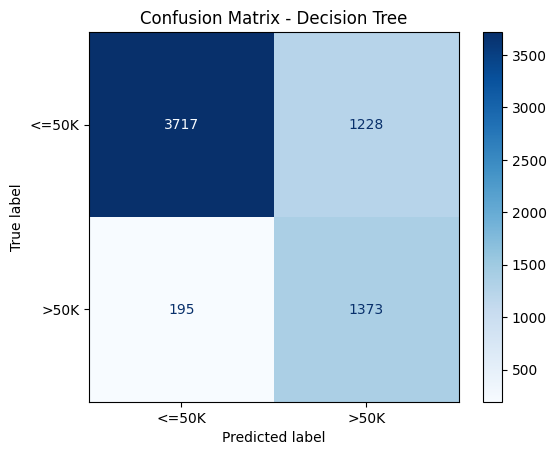

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, roc_curve,
                            confusion_matrix, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt

# 1. Load Data
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/income.csv"
data = pd.read_csv(url)

# 2. Preprocessing Khusus
# Handle missing values di fitur
data['workclass'] = data['workclass'].fillna('Unknown')
data['occupation'] = data['occupation'].fillna('Unknown')
data['native-country'] = data['native-country'].fillna('Unknown')

# 3. Pisahkan Fitur dan Target
X = data.drop(['income', 'fnlwgt', 'education'], axis=1)
y = data['income'].str.strip()  # Pastikan tidak ada whitespace

# 4. Pastikan tidak ada nilai aneh di target
valid_income = ['<=50K', '>50K']
y = y[y.isin(valid_income)]  # Filter hanya nilai yang valid

# Sesuaikan X dengan y yang sudah difilter
X = X.loc[y.index]

# 5. Encode target (<=50K: 0, >50K: 1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 6. Pipeline Preprocessing
numeric_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numeric_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), categorical_features)
])

# 7. Model Pipeline
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

dtree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        max_depth=5,
        random_state=42,
        class_weight='balanced'
    ))
])

# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

# 9. Training
print("Training model...")
knn_pipeline.fit(X_train, y_train)
dtree_pipeline.fit(X_train, y_train)

# 10. Evaluasi
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n=== Evaluasi {model_name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

evaluate_model(knn_pipeline, X_test, y_test, "k-NN")
evaluate_model(dtree_pipeline, X_test, y_test, "Decision Tree")

# 11. Feature Importance
dtree = dtree_pipeline.named_steps['classifier']
importances = dtree.feature_importances_

cat_encoder = preprocessor.named_transformers_['cat'].named_steps['encoder']
cat_features = cat_encoder.get_feature_names_out(categorical_features)
all_features = numeric_features + list(cat_features)
#tadinya ini dipakai untuk melihat fitur yang paling berpengaruh kepada decision tree
# plt.figure(figsize=(12, 8))
# pd.Series(importances, index=all_features).nlargest(10).plot(kind='barh')
# plt.title("Top 10 Feature Importances (Decision Tree)")
# plt.show()

Analisa ada di file terpisah agar tidak membingungkan

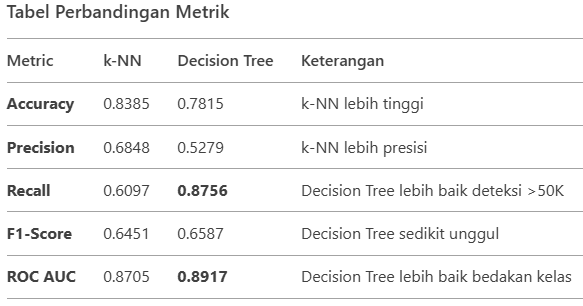

